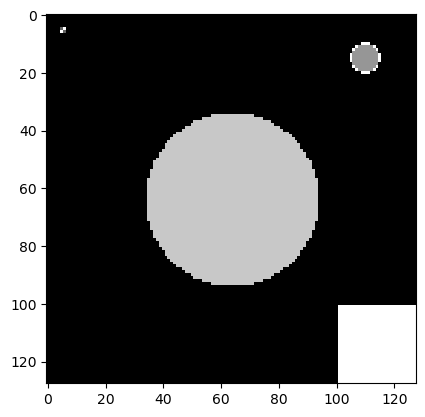

In [40]:
# A

import numpy as np
from matplotlib import pyplot as plt

# tworzymy tablice o wymiarach 128x128x3 (3 kanaly to RGB)
# uzupelnioną zerami = kolor czarny
data = np.zeros((128, 128, 3), dtype=np.uint8)


# chcemy zeby obrazek byl czarnobialy,
# wiec wszystkie trzy kanaly rgb uzupelniamy tymi samymi liczbami
# napiszmy do tego funkcje
def draw(img, x, y, color):
    img[x, y] = [color, color, color]


# zamalowanie 4 pikseli w lewym górnym rogu
draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)


# rysowanie kilku figur na obrazku
for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

# konwersja macierzy na obrazek i wyświetlenie
plt.imshow(data, interpolation='nearest')
plt.show()


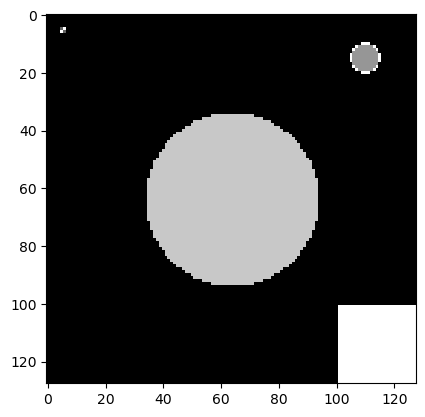

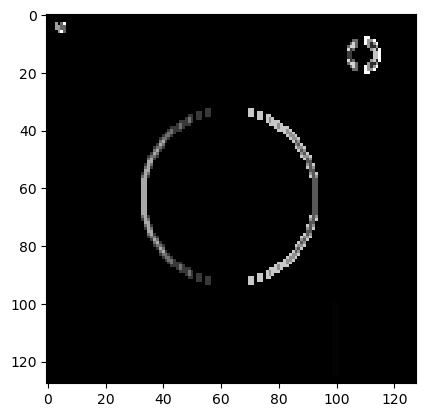

In [41]:
# B

import numpy as np
from matplotlib import pyplot as plt

data = np.zeros((128, 128, 3), dtype=np.uint8)


def draw(img, x, y, color):
    img[x, y] = [color, color, color]

    
def apply_filter(img, filt):
    out = np.zeros_like(img)
    for y in range(img.shape[0] - filt.shape[0] + 1):
        for x in range(img.shape[1] - filt.shape[1] + 1):
            for c in range(img.shape[2]):
                out[y, x, c] = np.sum(img[y:y+filt.shape[0], x:x+filt.shape[1], c] * filt)
    return out


draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)


for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

plt.imshow(data, interpolation='nearest')
plt.show()

filt = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
out = apply_filter(data, filt)

plt.imshow(out, interpolation='nearest')
plt.show()



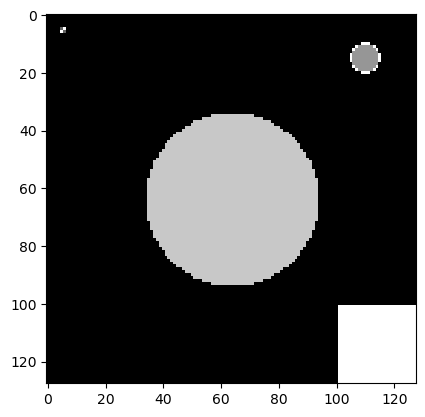

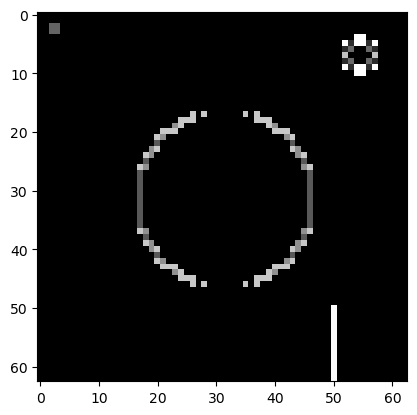

In [42]:
# C

import numpy as np
from matplotlib import pyplot as plt

data = np.zeros((128, 128, 3), dtype=np.uint8)


def draw(img, x, y, color):
    img[x, y] = [color, color, color]



draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)



for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)



kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])


s = 2


h_out = int((data.shape[0] - kernel.shape[0]) / s) + 1
w_out = int((data.shape[1] - kernel.shape[1]) / s) + 1


output = np.zeros((h_out, w_out, 3), dtype=np.uint8)


for i in range(0, data.shape[0] - kernel.shape[0] + 1, s):
    for j in range(0, data.shape[1] - kernel.shape[1] + 1, s):
        for k in range(3):
            output[int(i/s), int(j/s), k] = np.abs(np.sum(data[i:i+kernel.shape[0], j:j+kernel.shape[1], k] * kernel))



plt.imshow(data, interpolation='nearest')
plt.show()


plt.imshow(output, interpolation='nearest')
plt.show()


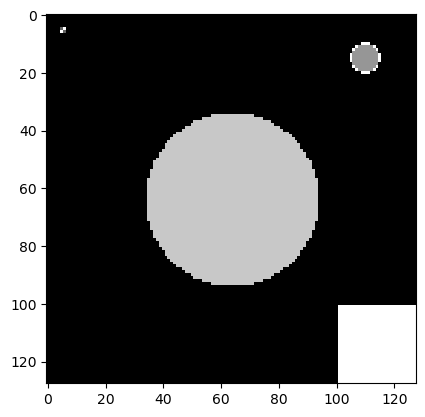

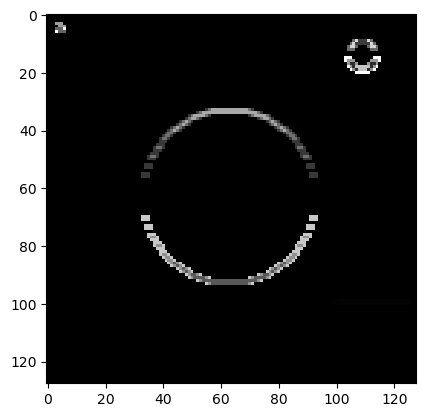

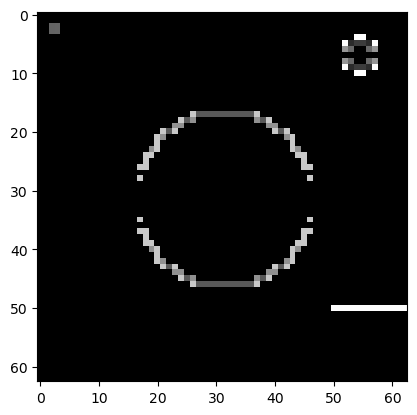

In [43]:
# D

import numpy as np
from matplotlib import pyplot as plt


data = np.zeros((128, 128, 3), dtype=np.uint8)



def draw(img, x, y, color):
    img[x, y] = [color, color, color]



draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)



for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)



kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])


s = 2


h_out = int((data.shape[0] - kernel.shape[0]) / s) + 1
w_out = int((data.shape[1] - kernel.shape[1]) / s) + 1


output = np.zeros((h_out, w_out, 3), dtype=np.uint8)


for i in range(0, data.shape[0] - kernel.shape[0] + 1, s):
    for j in range(0, data.shape[1] - kernel.shape[1] + 1, s):
        for k in range(3):
            output[int(i/s), int(j/s), k] = np.abs(np.sum(data[i:i+kernel.shape[0], j:j+kernel.shape[1], k] * kernel))



plt.imshow(data, interpolation='nearest')
plt.show()


out = apply_filter(data, kernel)


plt.imshow(out, interpolation='nearest')
plt.show()

plt.imshow(output, interpolation='nearest')
plt.show()


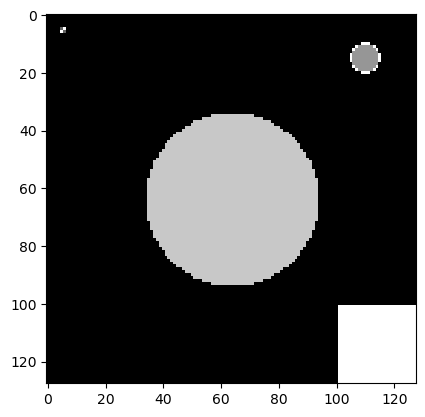

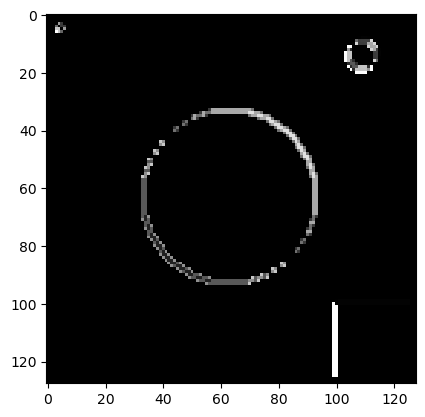

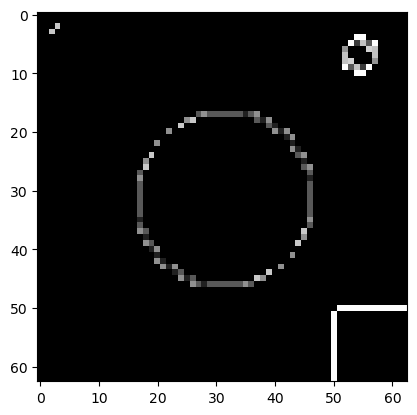

In [44]:
# E

import numpy as np
from matplotlib import pyplot as plt


data = np.zeros((128, 128, 3), dtype=np.uint8)



def draw(img, x, y, color):
    img[x, y] = [color, color, color]



draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)



for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)



kernel = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])


s = 2


h_out = int((data.shape[0] - kernel.shape[0]) / s) + 1
w_out = int((data.shape[1] - kernel.shape[1]) / s) + 1


output = np.zeros((h_out, w_out, 3), dtype=np.uint8)


for i in range(0, data.shape[0] - kernel.shape[0] + 1, s):
    for j in range(0, data.shape[1] - kernel.shape[1] + 1, s):
        for k in range(3):
            output[int(i/s), int(j/s), k] = np.abs(np.sum(data[i:i+kernel.shape[0], j:j+kernel.shape[1], k] * kernel))



plt.imshow(data, interpolation='nearest')
plt.show()


out = apply_filter(data, kernel)


plt.imshow(out, interpolation='nearest')
plt.show()

plt.imshow(output, interpolation='nearest')
plt.show()


# Zad 2

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
filenames = os.listdir("C:/Users/User/Downloads/dogs-cats-mini")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories})

In [4]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [5]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<Axes: >

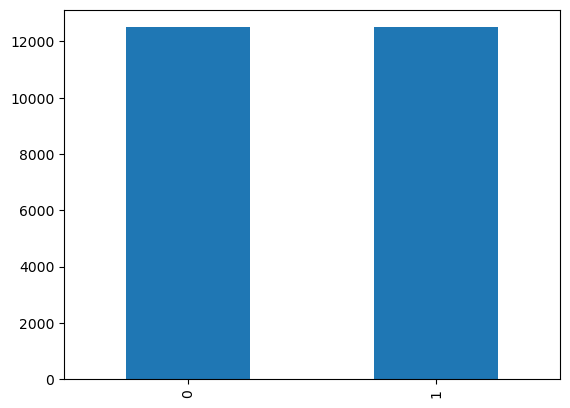

In [6]:
df['category'].value_counts().plot.bar()

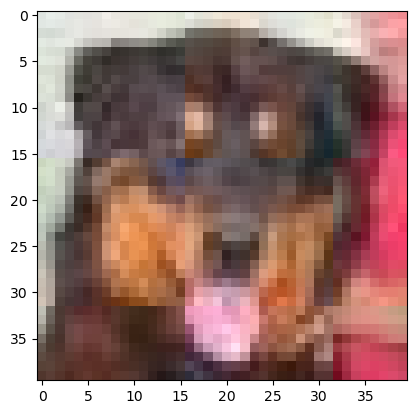

In [7]:
sample = random.choice(filenames)
image = imread("C:/Users/User/Downloads/dogs-cats-mini/"+sample)
plt.imshow(image)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       2

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [10]:
earlystop = EarlyStopping(patience=10)

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
callbacks = [earlystop, learning_rate_reduction]

In [13]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

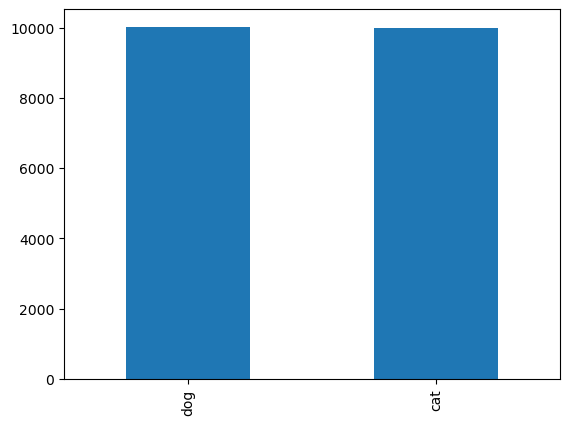

In [15]:
train_df['category'].value_counts().plot.bar()

<Axes: >

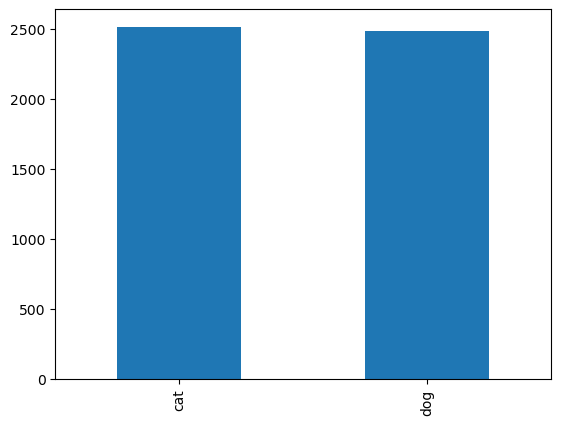

In [16]:
validate_df['category'].value_counts().plot.bar()

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/User/Downloads/dogs-cats-mini/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/User/Downloads/dogs-cats-mini/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [20]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/User/Downloads/dogs-cats-mini/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


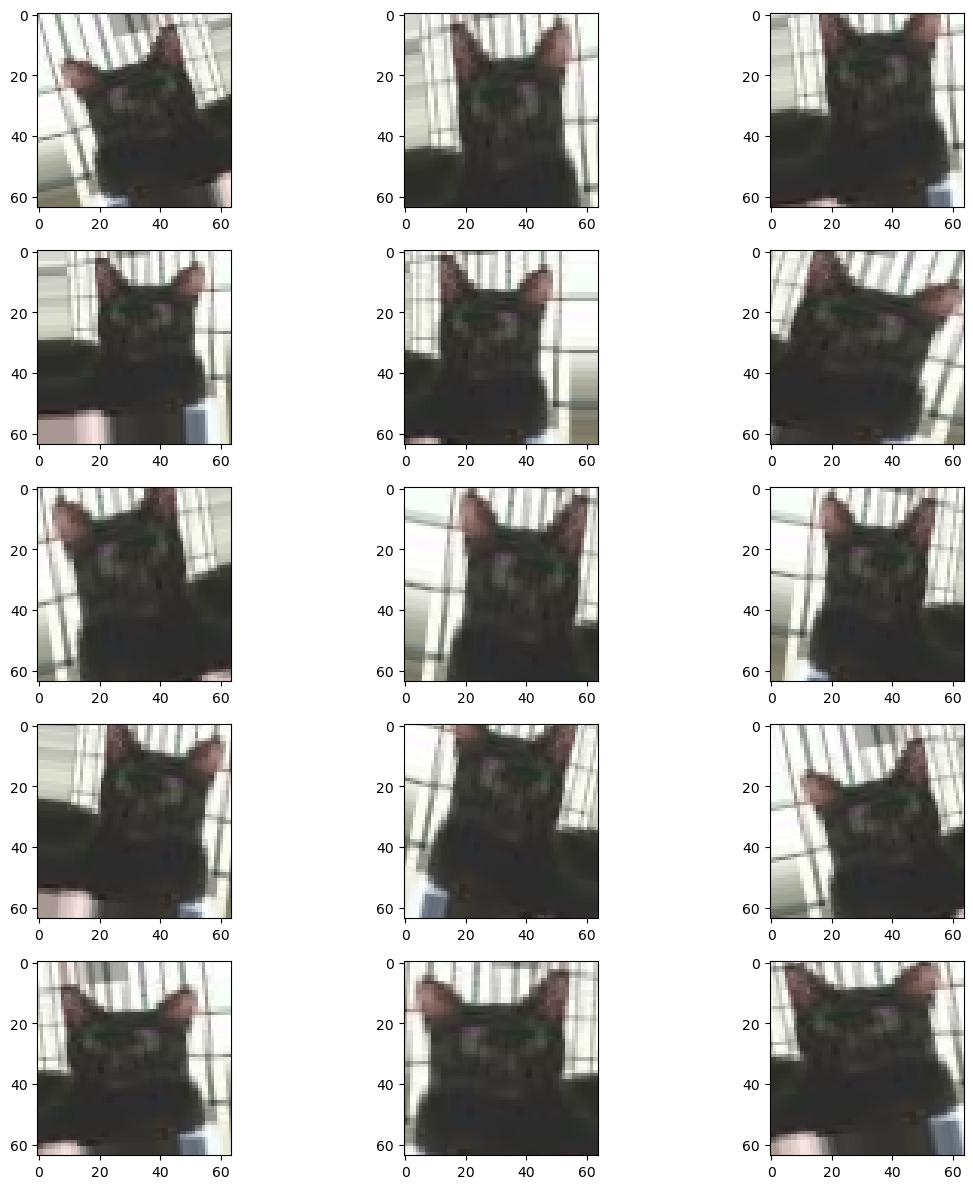

In [21]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [22]:
epochs=3 if FAST_RUN else 10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\User\AppData\Local\Temp\ipykernel_13196\3023682299.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
1333/1333 [==============================] - 539s 403ms/step - loss: 0.7643 - accuracy: 0.6126 - val_loss: 0.5972 - val_accuracy: 0.6769 - lr: 0.0010
Epoch 2/10
1333/1333 [==============================] - 131s 98ms/step - loss: 0.6130 - accuracy: 0.6780 - val_loss: 0.5184 - val_accuracy: 0.7495 - lr: 0.0010
Epoch 3/10
1333/1333 [==============================] - 130s 97ms/step - loss: 0.5840 - accuracy: 0.6983 - val_loss: 0.5441 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 4/10
1333/1333 [==============================] - 133s 100ms/step - loss: 0.5507 - accuracy: 0.7259 - val_loss: 0.4962 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 5/10
1333/1333 [==============================] - 129s 97ms/step - loss: 0.5405 - accuracy: 0.7337 - val_loss: 0.4765 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 6/10
1333/1333 [==============================] - 126s 94ms/step - loss: 0.5170 - accuracy: 0.7501 - val_loss: 0.4433 - val_accuracy: 0.7926 - lr: 0.0010
Epoch 7/10
1333/1333 [================

In [23]:
model.save_weights("model.h5")

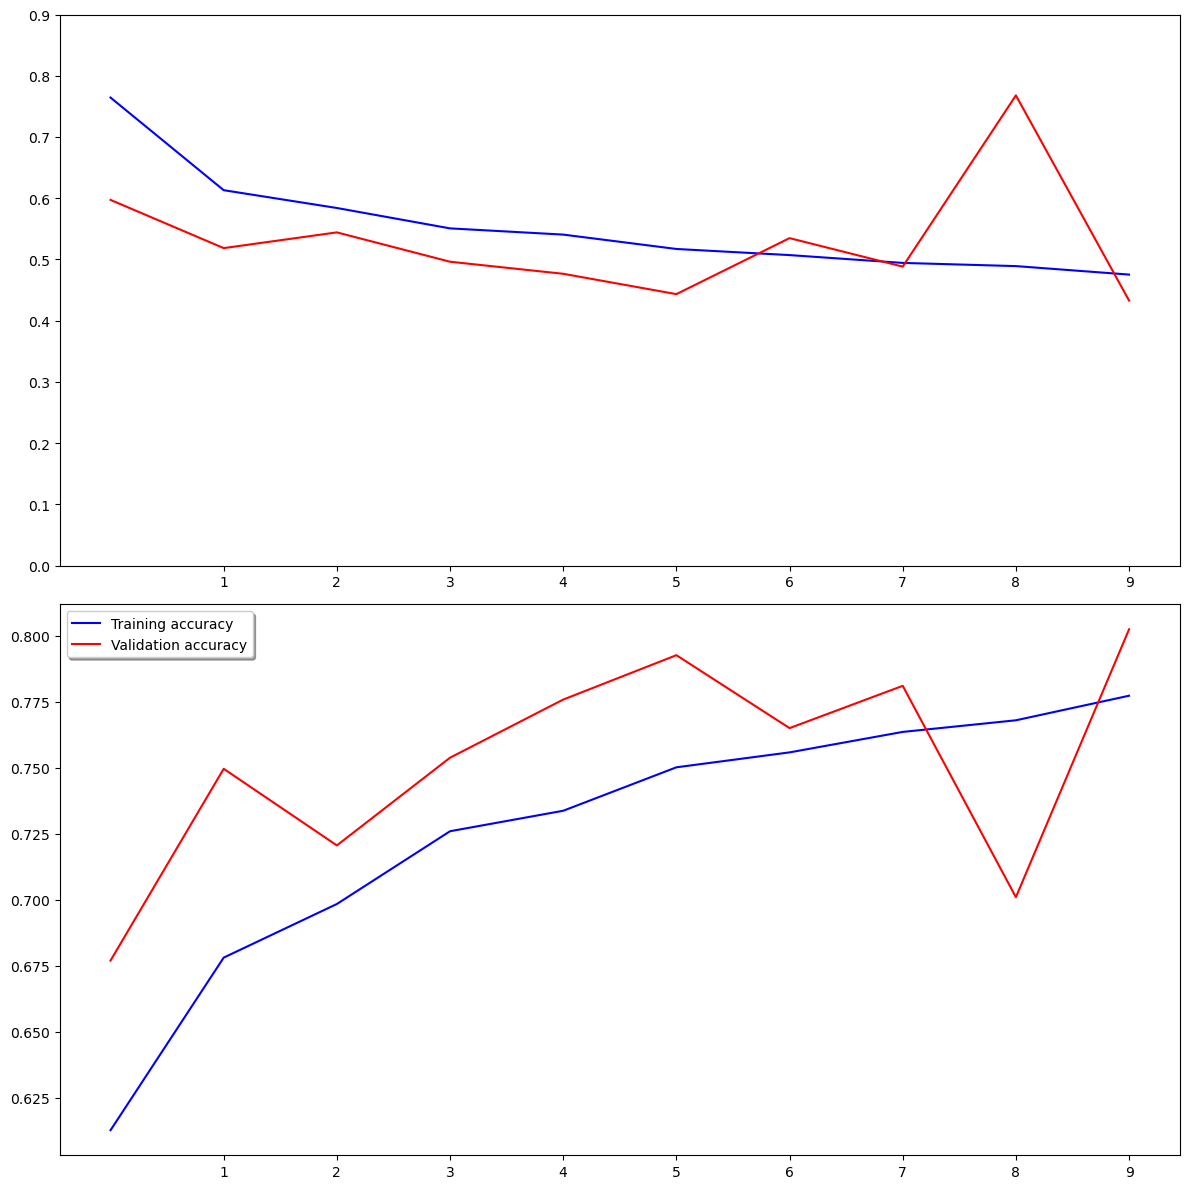

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [25]:
test_filenames = os.listdir("C:/Users/User/Downloads/dogs-cats-mini/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [26]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/Users/User/Downloads/dogs-cats-mini/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 25000 validated image filenames.


In [27]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\User\AppData\Local\Temp\ipykernel_13196\3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [28]:
test_df['category'] = np.argmax(predict, axis=-1)

In [29]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [30]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<Axes: >

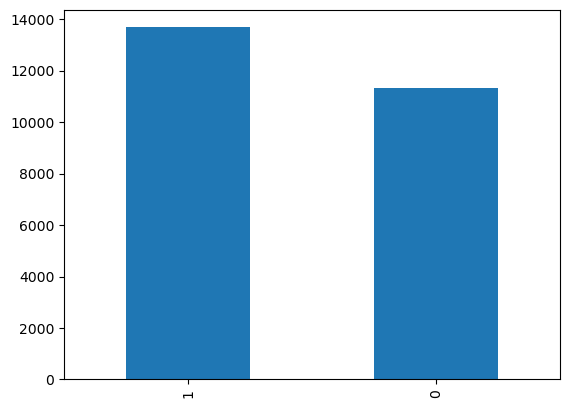

In [31]:
test_df['category'].value_counts().plot.bar()

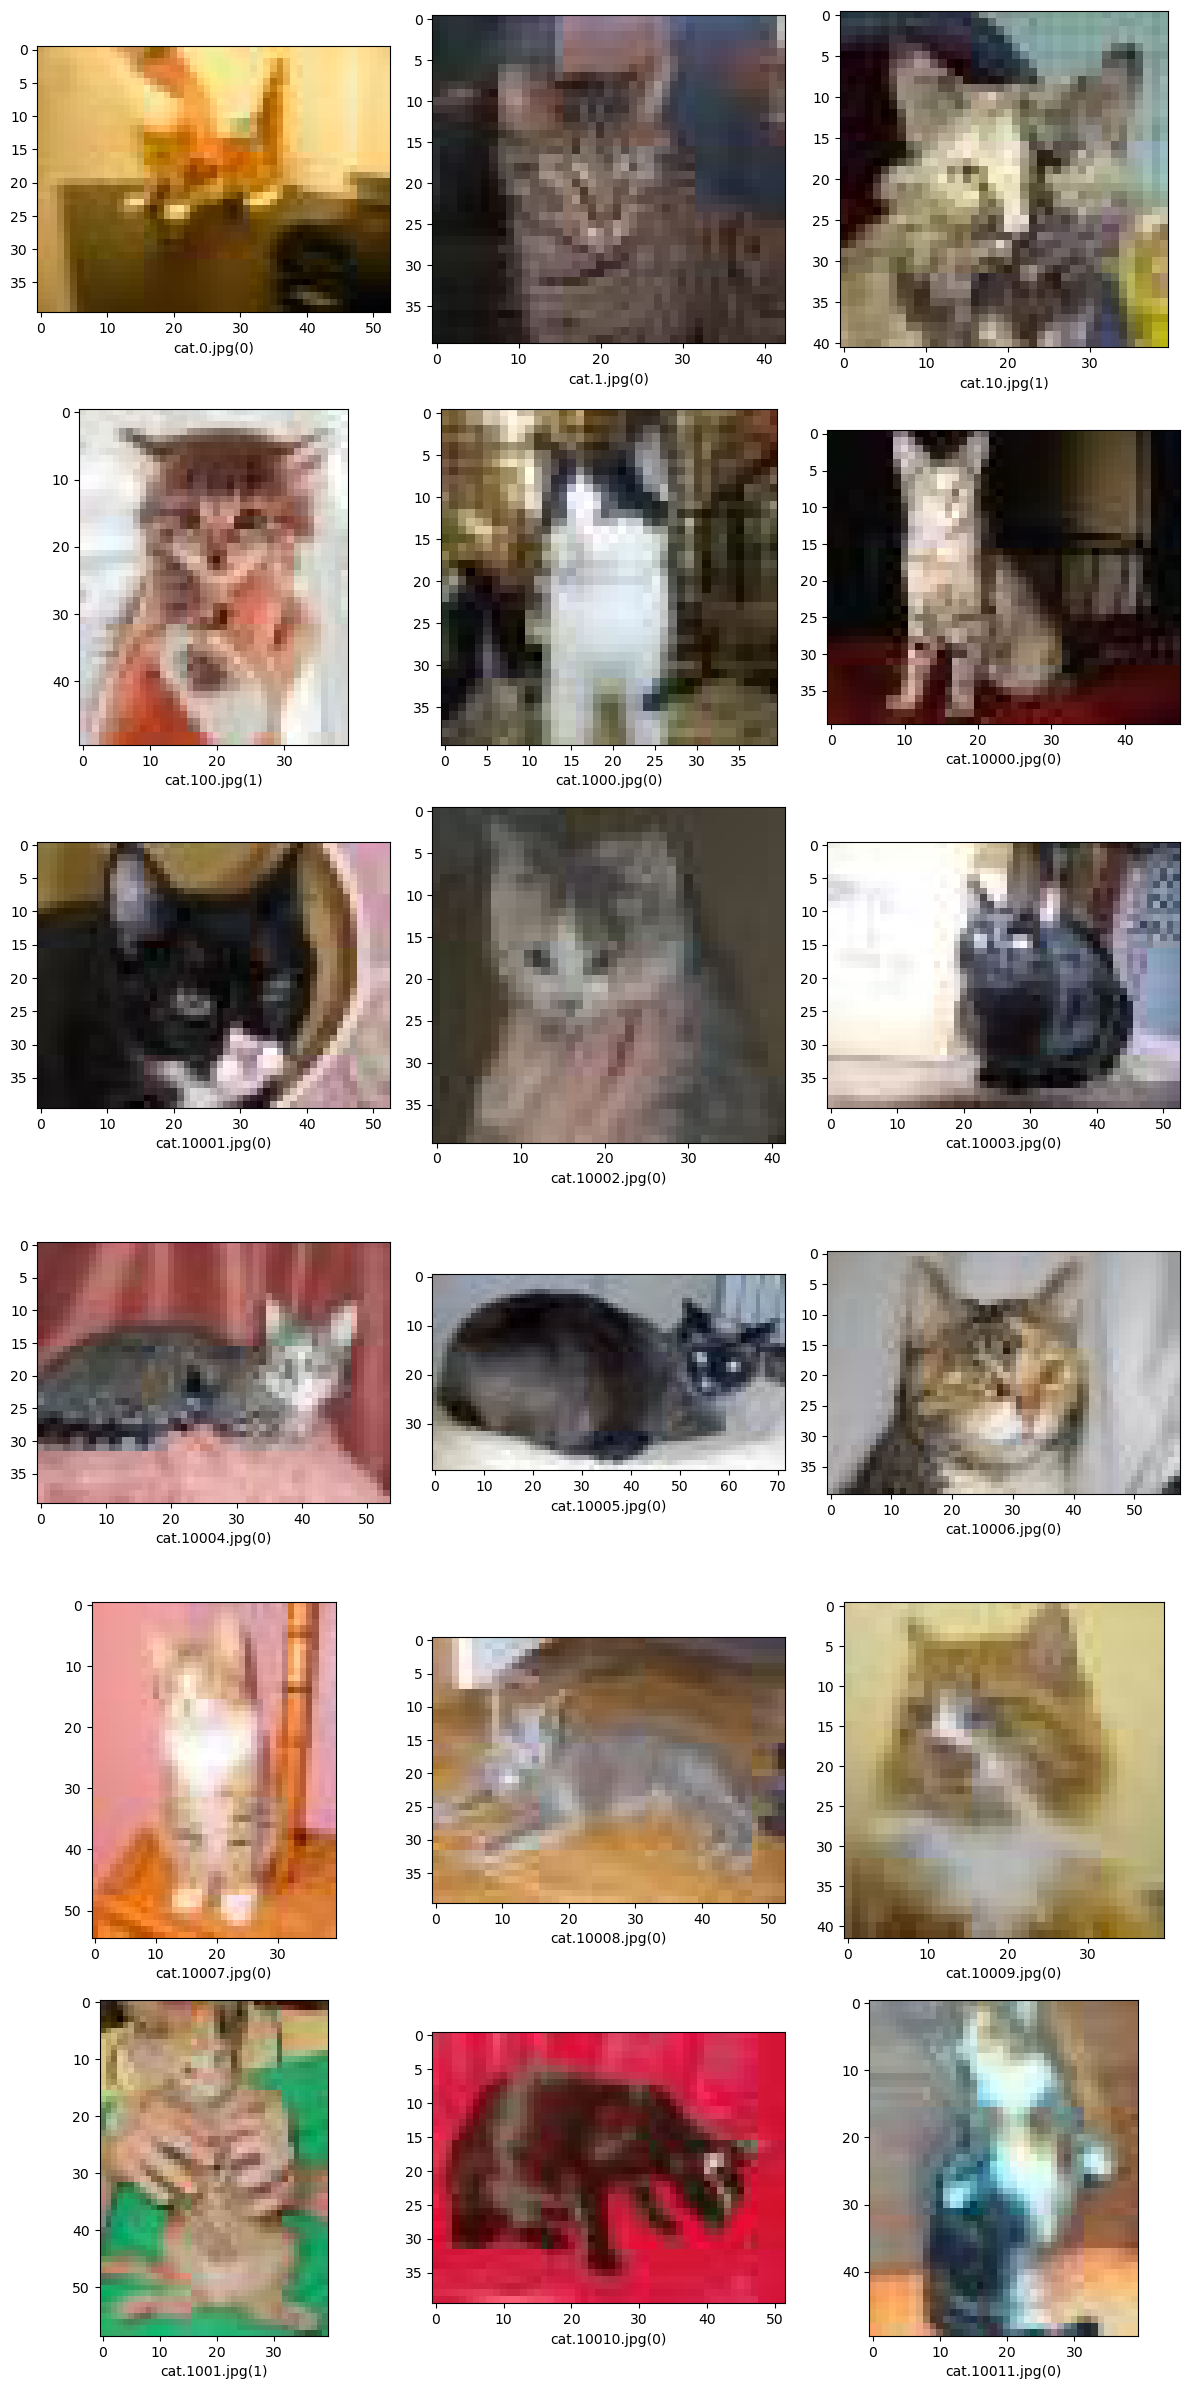

In [32]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = imread("C:/Users/User/Downloads/dogs-cats-mini/"+filename)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [33]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)